object


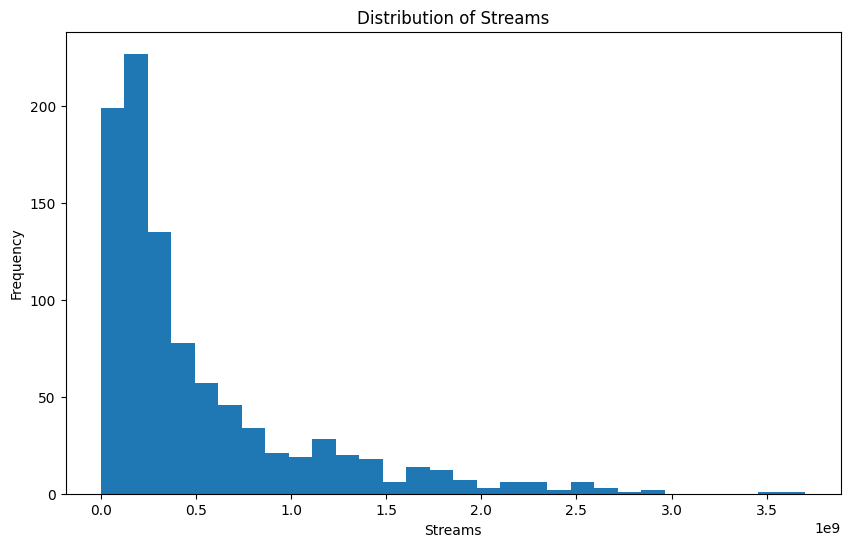

In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
import requests
import pandas as pd

# File ID from your Google Drive link
file_id = '1UCU2rQafKCSqolQLOQFhxf8iOumfkeRU'
new_file_name = 'Spotify.csv'
# Download the file
url = f"https://drive.google.com/uc?id={file_id}"
r = requests.get(url)

# Save the file
with open(new_file_name, 'wb') as f:
    f.write(r.content)

# Load the data
df = pd.read_csv(new_file_name)


# EDA

# Check the DataFrame Shape
print(df.shape)

print(df.columns)
print(df.columns.tolist())


# View the First Few Rows
print(df.head())


# View the Last Few Rows
print(df.tail())


# Checking DataTypes
print(df.dtypes)

print(df['streams'].dtype)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')






# # Cleaning the Data:
print(df.isnull().sum())

# # Drop Null Values
df = df.dropna()


# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the histogram for 'streams'
plt.figure(figsize=(10, 6))
df['streams'].hist(bins=30)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


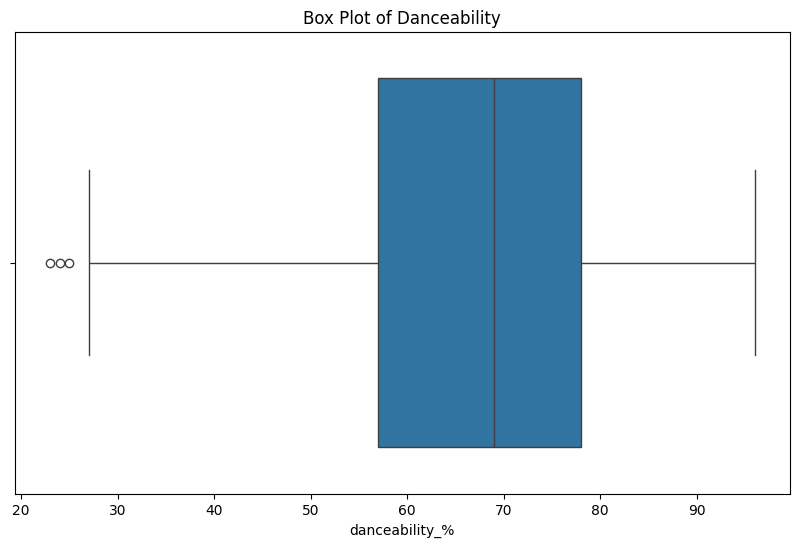

In [41]:
# Box plot for 'danceability_%'
plt.figure(figsize=(10, 6))
sns.boxplot(x='danceability_%', data=df)
plt.title('Box Plot of Danceability')
plt.show()


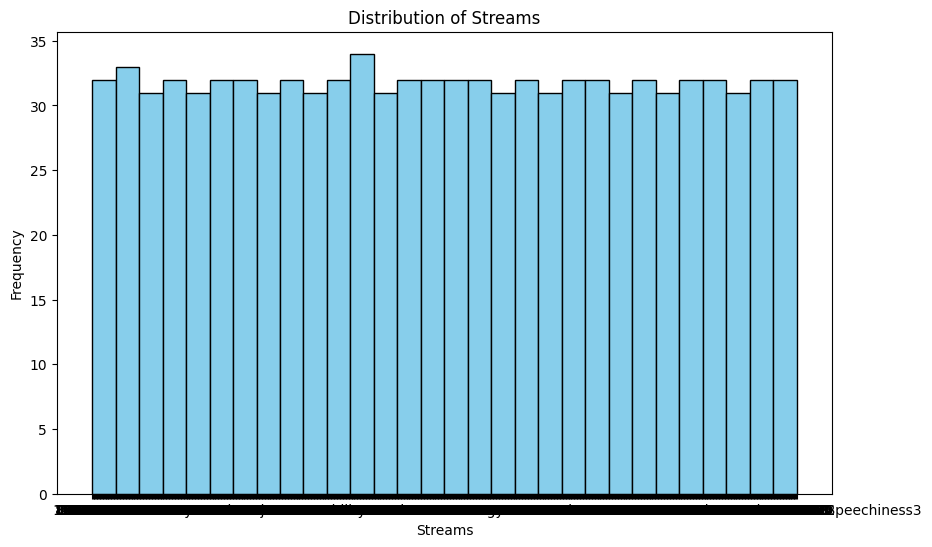

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for 'streams'
plt.figure(figsize=(10, 6))
df['streams'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


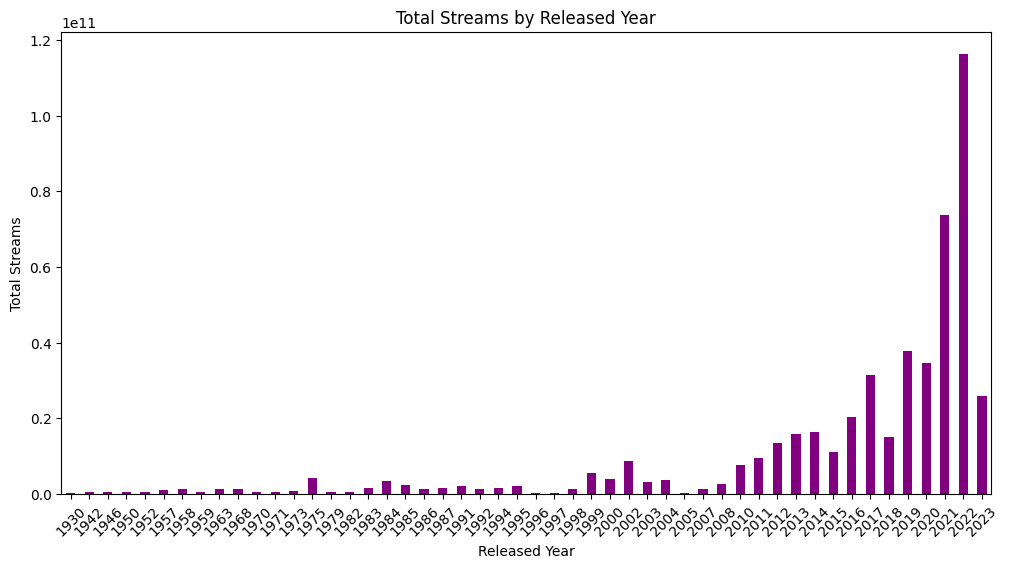

In [48]:
plt.figure(figsize=(12, 6))
df.groupby('released_year')['streams'].sum().plot(kind='bar', color='purple')
plt.title('Total Streams by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.show()


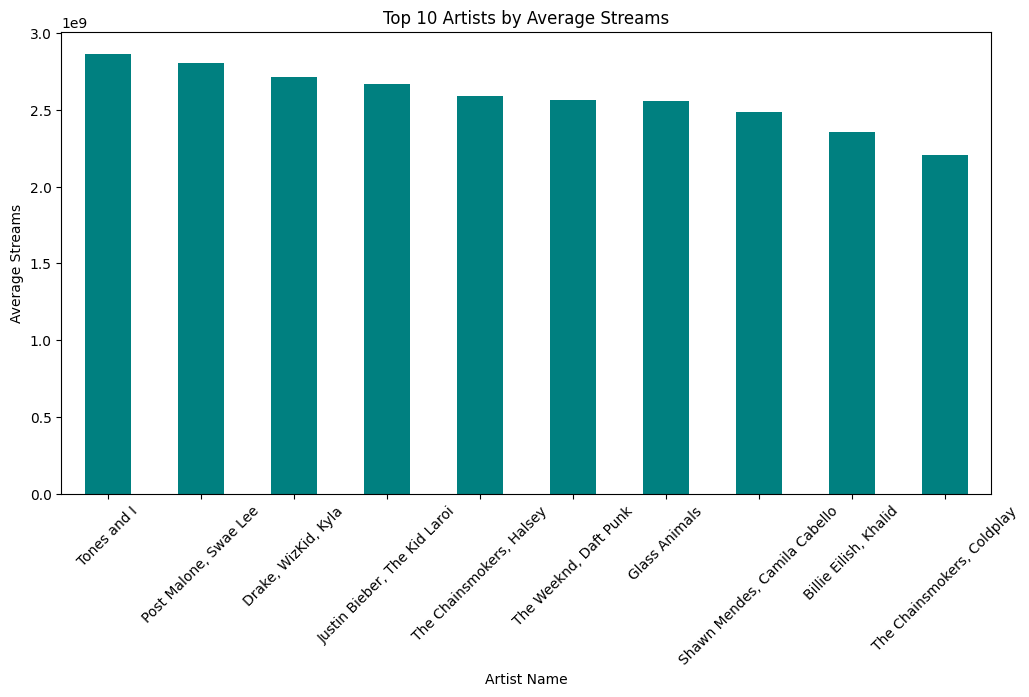

In [50]:
# Artist Comparison: Average Streams by Artist
plt.figure(figsize=(12, 6))
df.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Artists by Average Streams')
plt.xlabel('Artist Name')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.show()


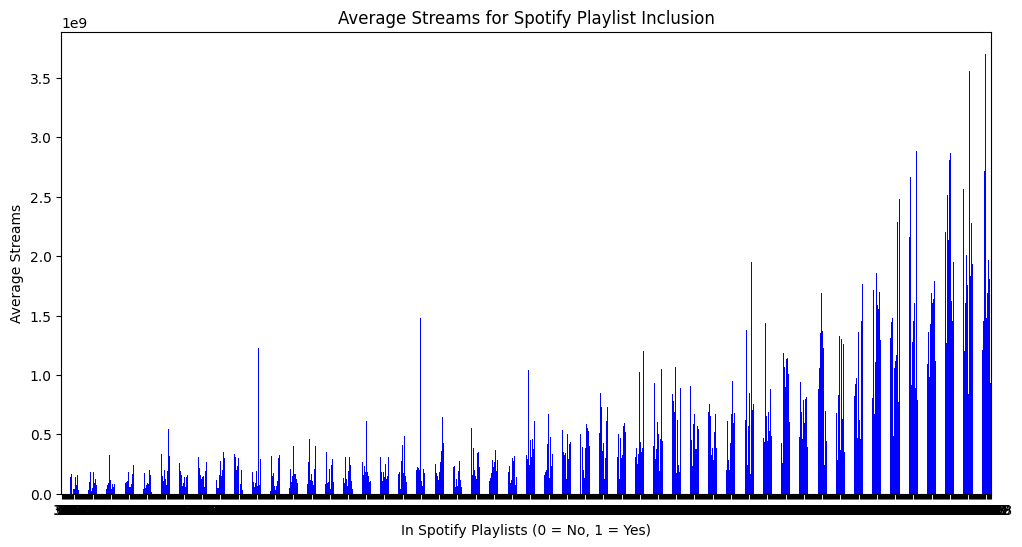

In [52]:
# Playlist Appearance
plt.figure(figsize=(12, 6))
df.groupby('in_spotify_playlists')['streams'].mean().plot(kind='bar', color='blue')
plt.title('Average Streams for Spotify Playlist Inclusion')
plt.xlabel('In Spotify Playlists (0 = No, 1 = Yes)')
plt.ylabel('Average Streams')
plt.xticks(rotation=0)
plt.show()


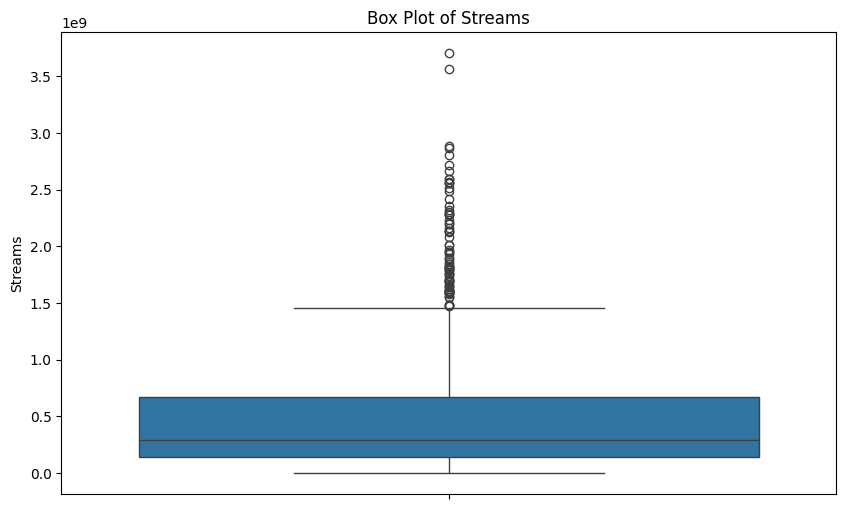

In [54]:
# Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='streams', data=df)
plt.title('Box Plot of Streams')
plt.ylabel('Streams')
plt.show()


In [55]:
print(df.describe())


       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.520000e+02   
mean            5200.124869          12.009444  5.141374e+08   
std             7897.608990          19.575992  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000           0.000000  1.416362e+08   
50%